In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  # plotting
import numpy as np  # Linear algebra
import os  # accessing directory structure
import pandas as pd  # data processing, CSV file I/O

# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

import random
import warnings
warnings.filterwarnings("ignore")

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
data = pd.read_csv("/content/drive/MyDrive/1year.csv")

In [109]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


In [110]:
data.tail()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
7007,0.038665,0.071884,0.48884,7.8004,221.01,0.038665,0.045892,11.068,1.0765,0.7956,...,0.071070,0.048599,0.92893,0,2.147,1.4679,53.735,6.7926,1.1116,1
7008,0.001091,0.8516,0.003463,1.0086,-44.467,0.086248,0.001091,0.17429,1.0297,0.14842,...,-0.198900,0.007349,0.97403,2.0331,6.8515,4.1096,142.830,2.5556,1.7346,1
7009,-0.091442,0.7055,-0.047216,0.92568,-7.2952,0,-0.090374,0.41744,9.1345,0.2945,...,0.000966,-0.31049,1.00740,0.077583,72.893,20.79,25.384,14.379,22.18,1
7010,0.13809,3.3357,-2.364,0.29128,-88.382,-3.3963,0.13809,-0.70021,9.9852,-2.3357,...,0.011347,-0.059122,0.97866,0,231.9,12.651,121.930,2.9935,351.85,1
7011,0.098271,0.8333,0.000426,1.0005,-43.191,0,0.12838,0.20019,2.5144,0.16682,...,0.150320,0.58909,0.85877,0,9.2728,4.9207,116.480,3.1336,12.748,1


In [111]:
print("Shape of Data:",data.shape)
r,c = data.shape
print("number of Rows:",r)
print("Number of Columns:",c)

Shape of Data: (7012, 65)
number of Rows: 7012
Number of Columns: 65


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7012 non-null   object 
 1   Attr2   7012 non-null   object 
 2   Attr3   7012 non-null   object 
 3   Attr4   7012 non-null   object 
 4   Attr5   7012 non-null   object 
 5   Attr6   7012 non-null   object 
 6   Attr7   7012 non-null   object 
 7   Attr8   7012 non-null   object 
 8   Attr9   7012 non-null   object 
 9   Attr10  7012 non-null   object 
 10  Attr11  7012 non-null   object 
 11  Attr12  7012 non-null   object 
 12  Attr13  7012 non-null   float64
 13  Attr14  7012 non-null   object 
 14  Attr15  7012 non-null   object 
 15  Attr16  7012 non-null   object 
 16  Attr17  7012 non-null   object 
 17  Attr18  7012 non-null   object 
 18  Attr19  7012 non-null   float64
 19  Attr20  7012 non-null   float64
 20  Attr21  7012 non-null   object 
 21  Attr22  7012 non-null   object 
 22  

In [113]:
print("Shape of Data:",data.shape)
r,c = data.shape
print("number of Rows:",r)
print("Number of Columns:",c)

Shape of Data: (7012, 65)
number of Rows: 7012
Number of Columns: 65


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7012 non-null   object 
 1   Attr2   7012 non-null   object 
 2   Attr3   7012 non-null   object 
 3   Attr4   7012 non-null   object 
 4   Attr5   7012 non-null   object 
 5   Attr6   7012 non-null   object 
 6   Attr7   7012 non-null   object 
 7   Attr8   7012 non-null   object 
 8   Attr9   7012 non-null   object 
 9   Attr10  7012 non-null   object 
 10  Attr11  7012 non-null   object 
 11  Attr12  7012 non-null   object 
 12  Attr13  7012 non-null   float64
 13  Attr14  7012 non-null   object 
 14  Attr15  7012 non-null   object 
 15  Attr16  7012 non-null   object 
 16  Attr17  7012 non-null   object 
 17  Attr18  7012 non-null   object 
 18  Attr19  7012 non-null   float64
 19  Attr20  7012 non-null   float64
 20  Attr21  7012 non-null   object 
 21  Attr22  7012 non-null   object 
 22  

In [115]:
data.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

Missing values

In [116]:
(data.eq('?')).any()

Attr1      True
Attr2      True
Attr3      True
Attr4      True
Attr5      True
          ...  
Attr61     True
Attr62    False
Attr63     True
Attr64     True
class     False
Length: 65, dtype: bool

In [117]:
data.replace('?',np.NAN,inplace=True)

In [118]:
data.isnull().sum()

Attr1      3
Attr2      3
Attr3      3
Attr4     30
Attr5      8
          ..
Attr61    22
Attr62     0
Attr63    30
Attr64    34
class      0
Length: 65, dtype: int64

In [119]:
data.isnull().sum().sum()

5818

In [120]:
for i in range(1, 65):
    data[f'Attr{i}'] = pd.to_numeric(data[f'Attr{i}'], errors='coerce')

In [121]:
data=data.fillna(data.mean())

In [122]:
data.isnull().sum().sum()

0

In [123]:
data.isnull().any()

Attr1     False
Attr2     False
Attr3     False
Attr4     False
Attr5     False
          ...  
Attr61    False
Attr62    False
Attr63    False
Attr64    False
class     False
Length: 65, dtype: bool

###Exploratory Data Analysis :-

Descriptive analysis

In [124]:
{column:len(data[column].unique()) for column in data.columns}

{'Attr1': 6618,
 'Attr2': 6593,
 'Attr3': 6691,
 'Attr4': 6274,
 'Attr5': 6806,
 'Attr6': 4202,
 'Attr7': 6661,
 'Attr8': 6671,
 'Attr9': 5500,
 'Attr10': 6621,
 'Attr11': 6635,
 'Attr12': 6713,
 'Attr13': 6605,
 'Attr14': 6661,
 'Attr15': 6678,
 'Attr16': 6685,
 'Attr17': 6233,
 'Attr18': 6661,
 'Attr19': 6666,
 'Attr20': 6529,
 'Attr21': 4024,
 'Attr22': 6093,
 'Attr23': 6640,
 'Attr24': 6593,
 'Attr25': 6661,
 'Attr26': 6674,
 'Attr27': 6005,
 'Attr28': 6707,
 'Attr29': 5911,
 'Attr30': 6592,
 'Attr31': 6673,
 'Attr32': 6501,
 'Attr33': 6595,
 'Attr34': 6726,
 'Attr35': 6680,
 'Attr36': 6317,
 'Attr37': 4125,
 'Attr38': 6585,
 'Attr39': 6680,
 'Attr40': 6689,
 'Attr41': 6620,
 'Attr42': 6112,
 'Attr43': 6368,
 'Attr44': 6596,
 'Attr45': 6579,
 'Attr46': 6540,
 'Attr47': 6547,
 'Attr48': 6661,
 'Attr49': 6660,
 'Attr50': 6433,
 'Attr51': 6558,
 'Attr52': 6408,
 'Attr53': 6481,
 'Attr54': 6301,
 'Attr55': 6730,
 'Attr56': 6638,
 'Attr57': 6610,
 'Attr58': 5909,
 'Attr59': 4134,
 'Attr

In [125]:
print("Information about the Datset")
data.info()

Information about the Datset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7012 non-null   float64
 1   Attr2   7012 non-null   float64
 2   Attr3   7012 non-null   float64
 3   Attr4   7012 non-null   float64
 4   Attr5   7012 non-null   float64
 5   Attr6   7012 non-null   float64
 6   Attr7   7012 non-null   float64
 7   Attr8   7012 non-null   float64
 8   Attr9   7012 non-null   float64
 9   Attr10  7012 non-null   float64
 10  Attr11  7012 non-null   float64
 11  Attr12  7012 non-null   float64
 12  Attr13  7012 non-null   float64
 13  Attr14  7012 non-null   float64
 14  Attr15  7012 non-null   float64
 15  Attr16  7012 non-null   float64
 16  Attr17  7012 non-null   float64
 17  Attr18  7012 non-null   float64
 18  Attr19  7012 non-null   float64
 19  Attr20  7012 non-null   float64
 20  Attr21  7012 non-null   float64
 21  Attr22  

In [ ]:
data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,...,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2.164000e+03,2164.000000,2164.000000,2164.0
mean,-0.125994,0.467473,0.221102,3.207731,462.125375,0.214679,0.247490,2.809016,7.317679,2.447815,...,-0.222496,0.203481,1.223497,0.203921,73.199397,18.324643,3.529613e+03,7.868984,309.556242,0.0
std,7.849027,0.274810,0.261004,22.253505,21311.744355,6.532040,8.660704,7.707624,124.652580,36.765993,...,15.103528,1.692055,15.103503,7.182678,901.925262,453.725807,1.564150e+05,12.286998,7216.612427,0.0
min,-256.890000,-2.421800,-1.313700,0.000000,-14103.000000,-2.978700,-189.560000,-141.410000,0.000098,-0.933580,...,-701.630000,-47.491000,-0.004194,-256.990000,0.014443,0.000408,0.000000e+00,0.000050,0.000066,0.0
25%,0.032137,0.255955,0.055365,1.139975,-36.989500,0.000000,0.040002,0.515637,1.057525,0.332850,...,0.033924,0.070866,0.834657,0.000000,6.093750,4.616750,4.249450e+01,3.496275,2.365525,0.0
50%,0.092146,0.448395,0.212050,1.634900,1.177700,0.000000,0.112020,1.179050,1.276700,0.532470,...,0.085960,0.200275,0.916725,0.013458,9.787650,6.479050,6.733450e+01,5.423600,4.364850,0.0
75%,0.188475,0.651275,0.393360,2.794175,45.836250,0.176522,0.223020,2.809016,2.074400,0.716457,...,0.168387,0.388195,0.968518,0.228502,18.200000,9.432575,1.045250e+02,8.518600,9.663900,0.0
max,2.249400,1.933600,1.000000,1017.800000,990900.000000,303.670000,203.450000,208.880000,3876.100000,973.550000,...,1.000000,24.354000,702.630000,112.880000,34443.000000,21110.000000,7.276000e+06,292.550000,294770.000000,0.0


overview of class(Bankrupt)

In [126]:

# Display value counts
print(data['class'].value_counts())
print('-'*30)

print('Financially stable: ', round(data['class'].value_counts()[0]/len(data) * 100, 2), '% of the dataset')
print('Financially unstable: ', round(data['class'].value_counts()[1]/len(data) * 100, 2), '% of the dataset')

class
0    6756
1     256
Name: count, dtype: int64
------------------------------
Financially stable:  96.35 % of the dataset
Financially unstable:  3.65 % of the dataset


In [127]:
print(data['class'].value_counts())

class
0    6756
1     256
Name: count, dtype: int64


Visual Analysis:

<Axes: xlabel='class', ylabel='count'>

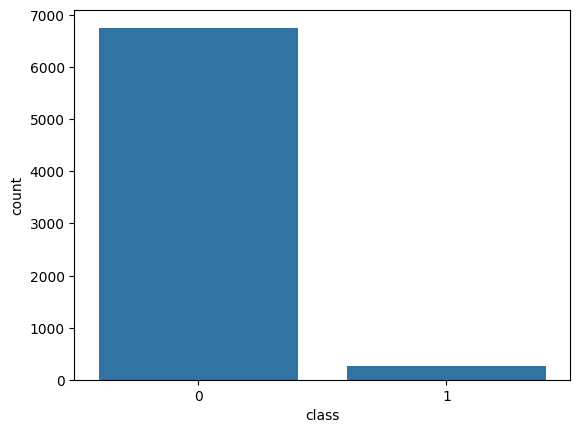

In [128]:
sns.countplot(data=data , x='class')

Univariant Analysis


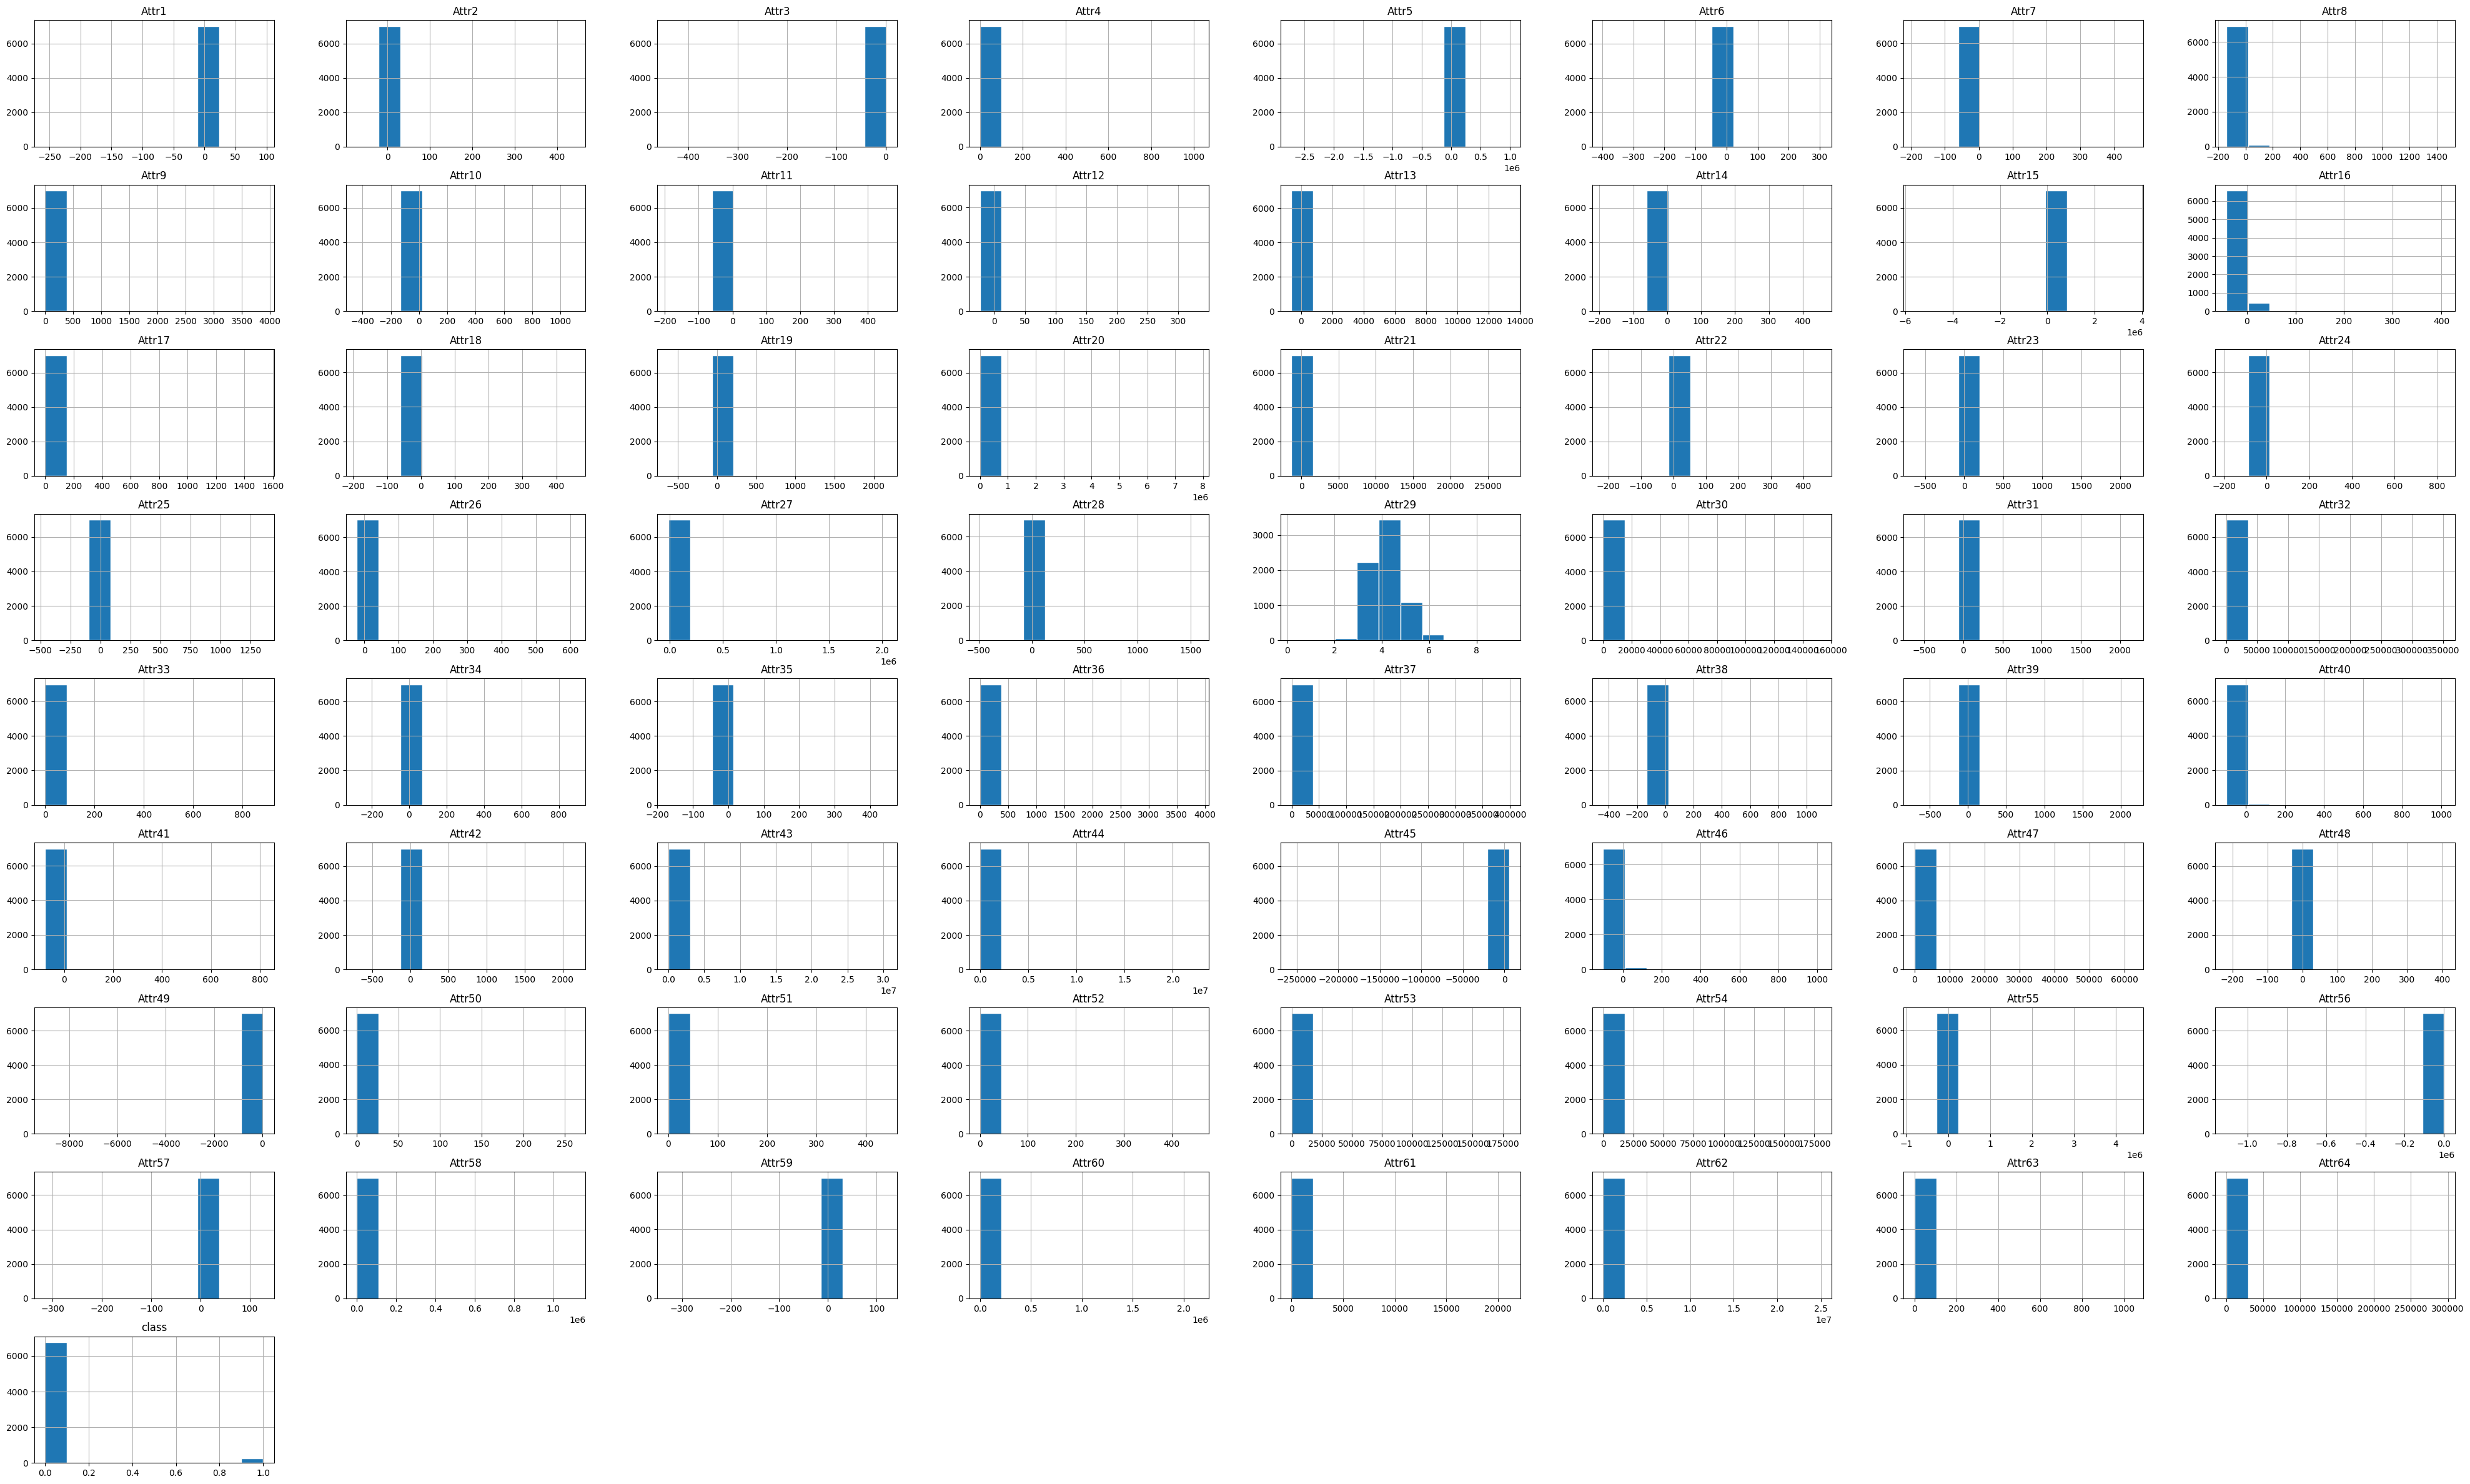

In [129]:
data.hist(figsize=(50,30), edgecolor='white')
plt.show()

Bivariate Analysis

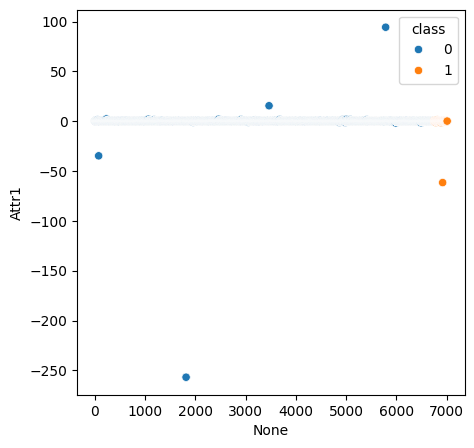

In [130]:
# ROA(Rate of Interest) net profit/total Assets
#Attr1
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(x=data.index,y='Attr1' ,hue='class',data=data)
plt.show()

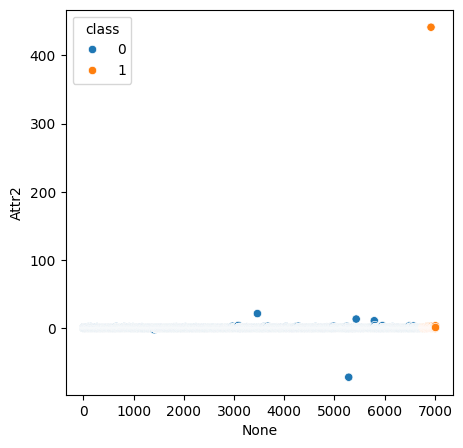

In [131]:
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(x=data.index,y='Attr2' ,hue='class',data=data)
plt.show()

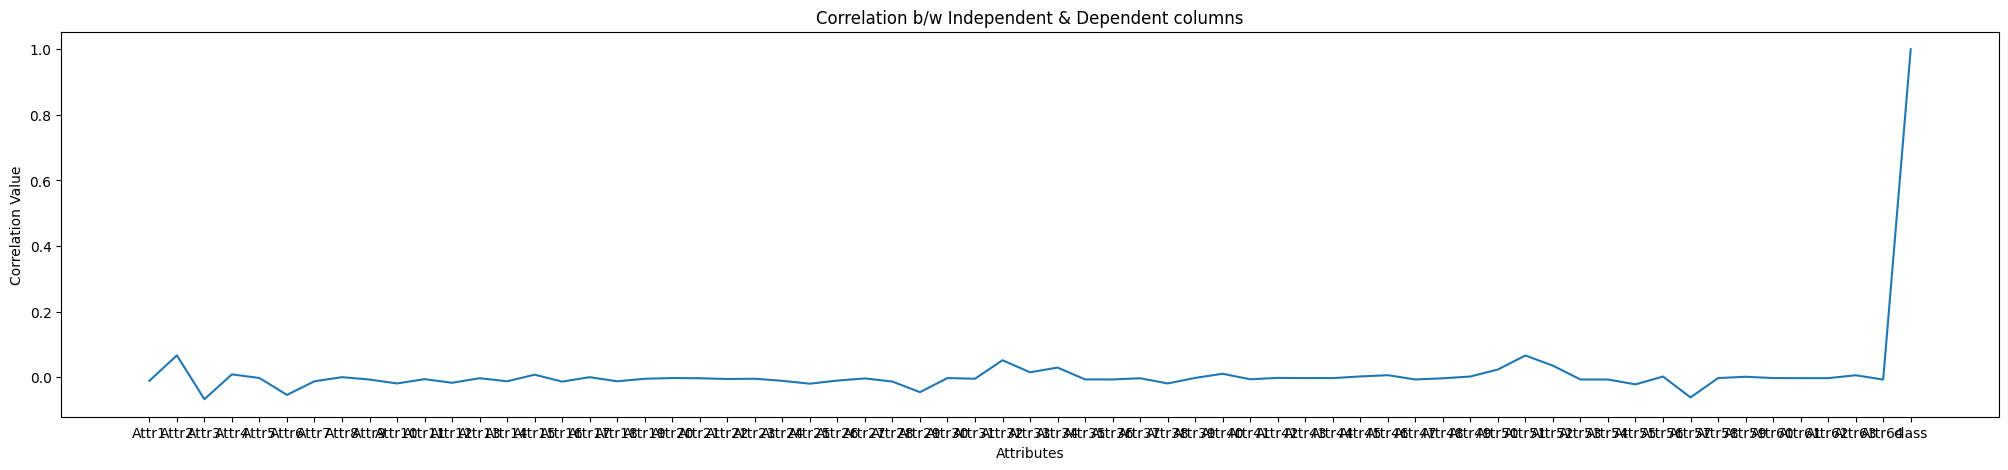

In [132]:
plt.figure(figsize = [25, 5])

sns.lineplot(data.corr()['class'])

plt.xlabel('Attributes')
plt.ylabel('Correlation Value')
plt.title('Correlation b/w Independent & Dependent columns')
plt.show()


Multivariate analysis

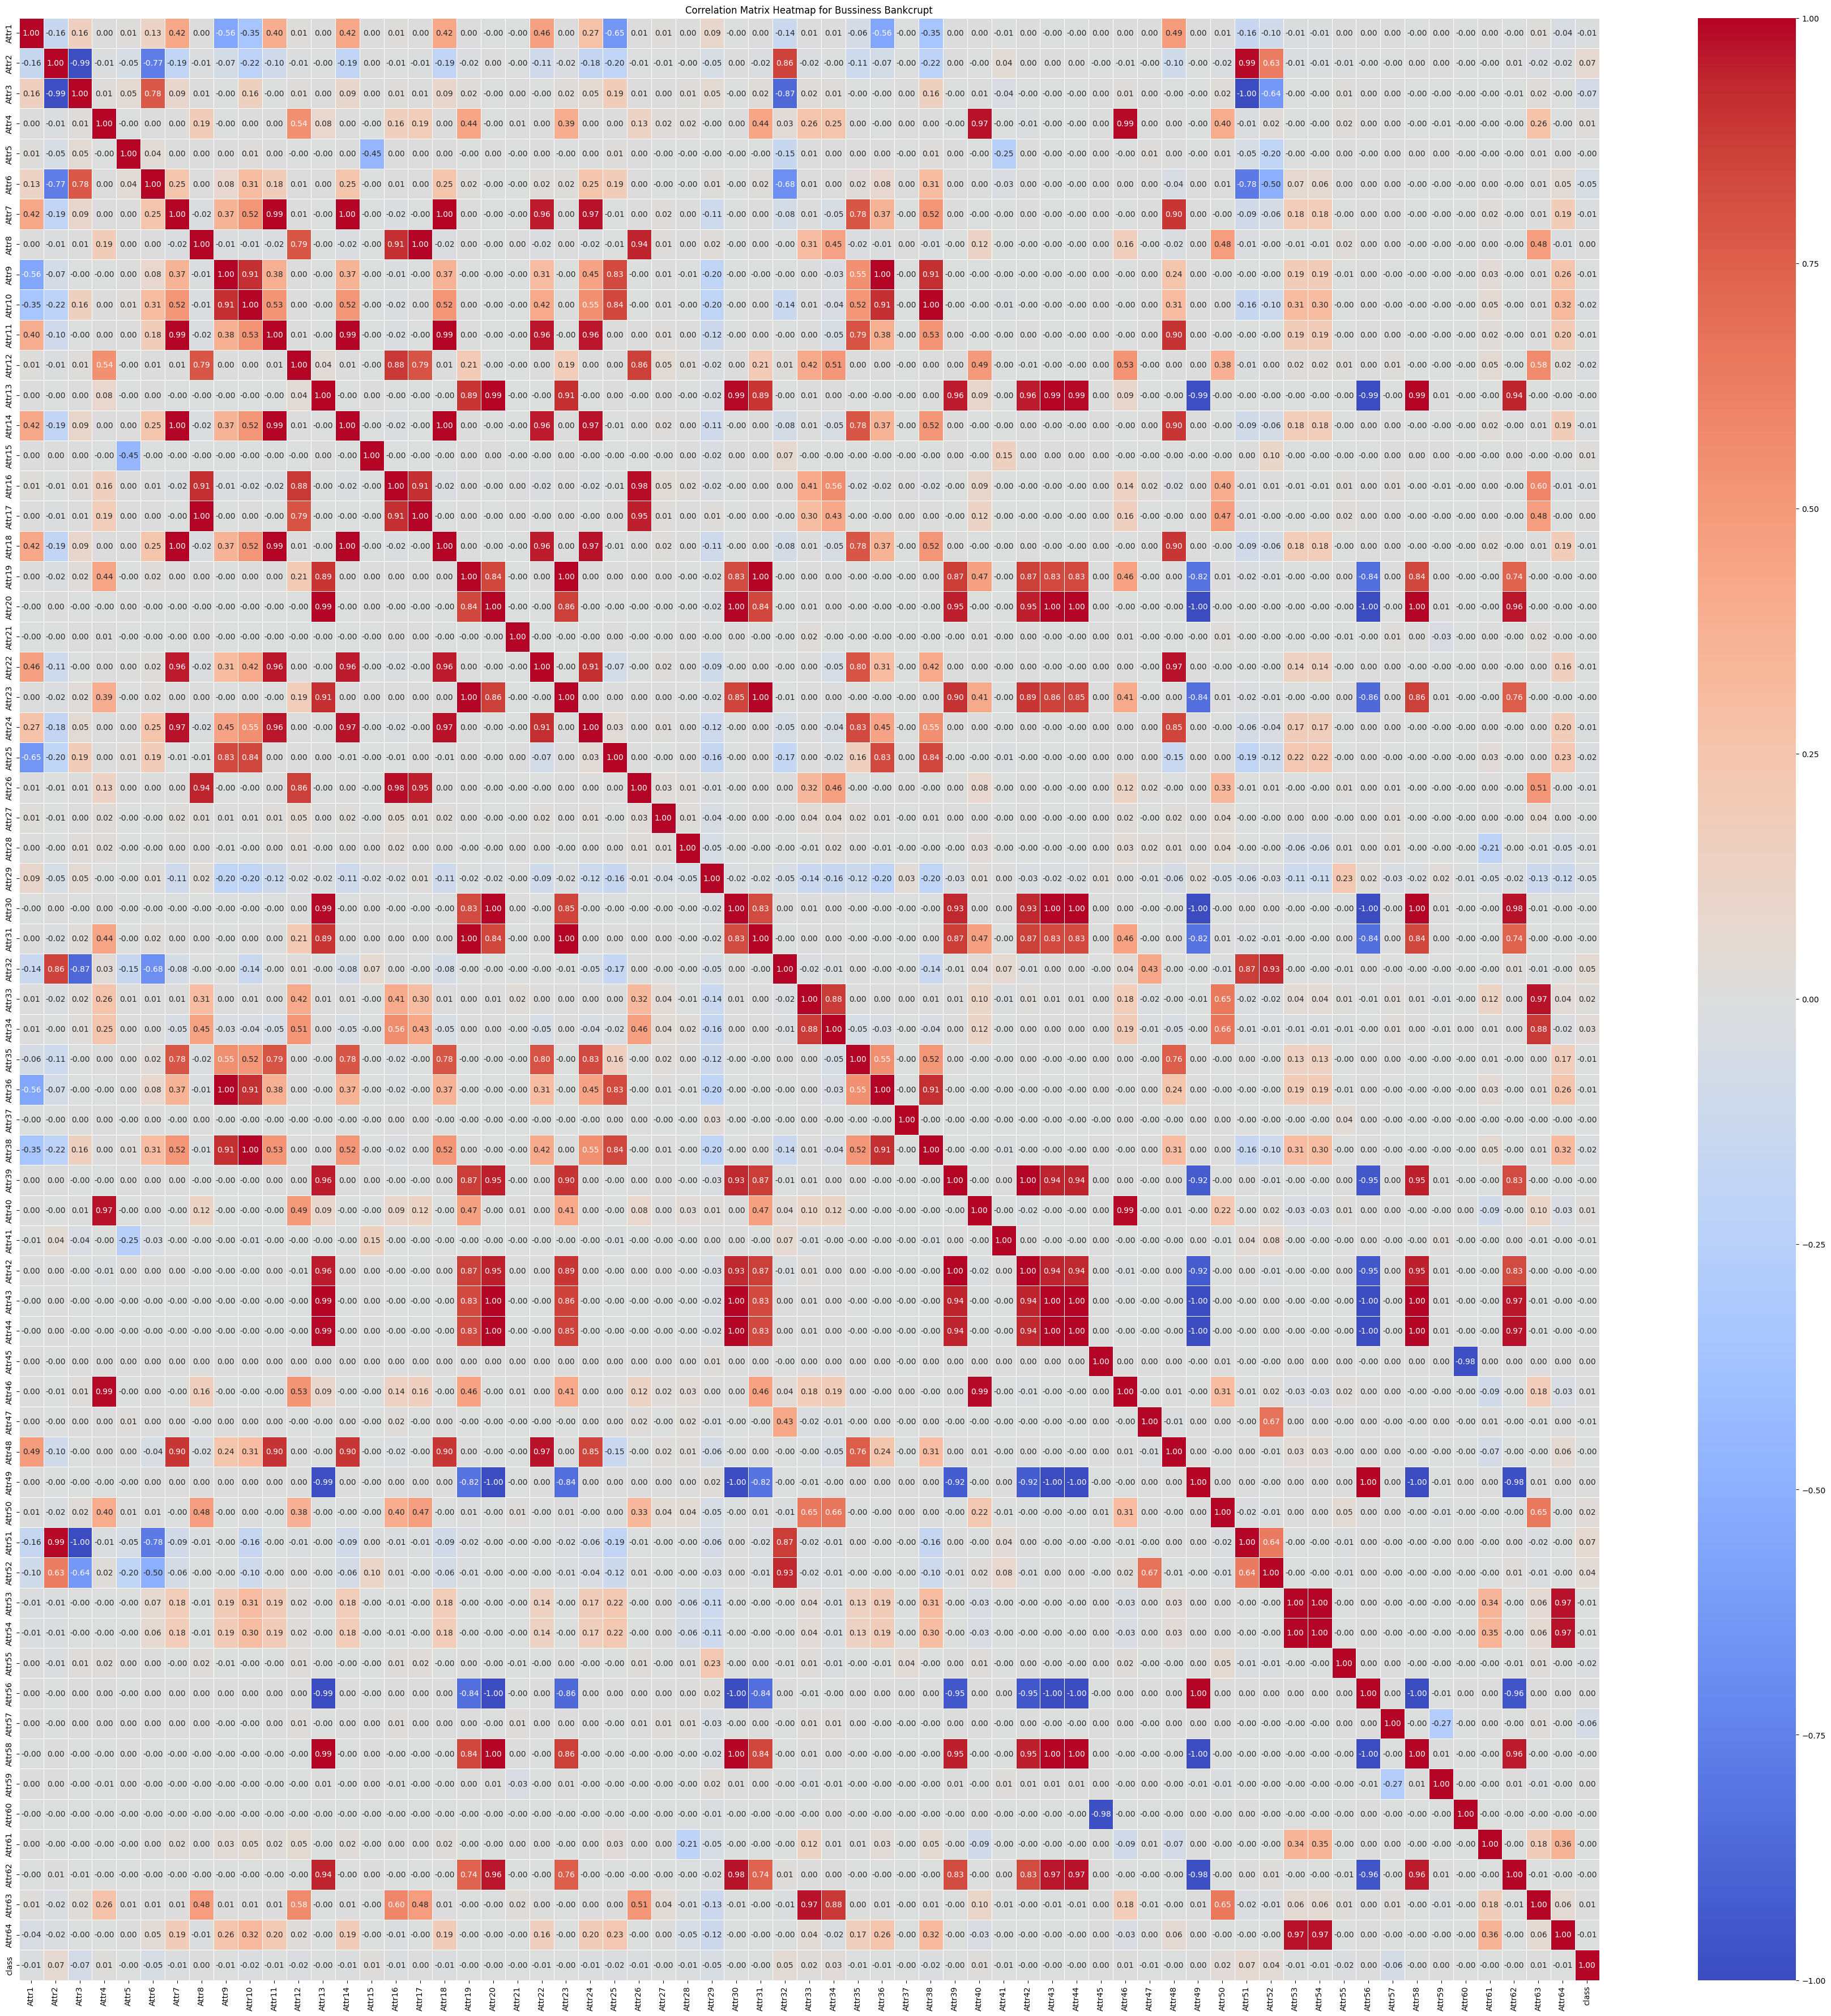

In [133]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

corrmat= data.corr()
plt.figure(figsize=(45,45)) # Use plt instead of plot
sns.heatmap(corrmat,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Bussiness Bankcrupt')
plt.show() # Display the plot

###Model Buliding :-

Feature Selection

In [134]:
sorted_corr=data.corr()["class"].sort_values(ascending=False)

In [135]:
first_6 = sorted_corr.head(6)
last_6 = sorted_corr.tail(6)

print("First 6 elements:\n", first_6)
print("Last 6 elements:\n", last_6)

First 6 elements:
 class     1.000000
Attr2     0.066883
Attr51    0.066582
Attr32    0.052046
Attr52    0.035374
Attr34    0.029611
Name: class, dtype: float64
Last 6 elements:
 Attr25   -0.019453
Attr55   -0.021516
Attr29   -0.045269
Attr6    -0.053672
Attr57   -0.061266
Attr3    -0.066805
Name: class, dtype: float64


In [136]:
selected_variable=data.loc[:,["Attr2","Attr51","Attr32","Attr52", "Attr34","Attr55","Attr29","Attr6","Attr57","Attr3"]]

In [137]:
x=selected_variable
y=data['class']

OUtliers

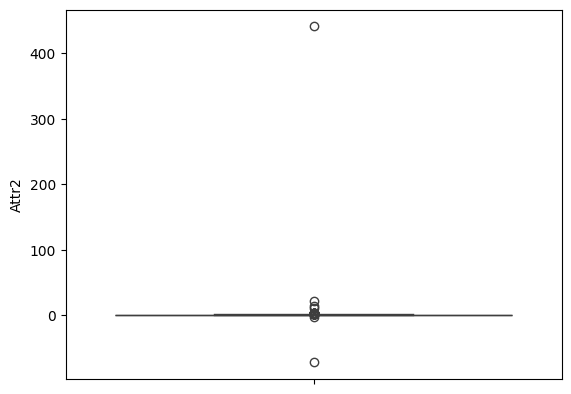

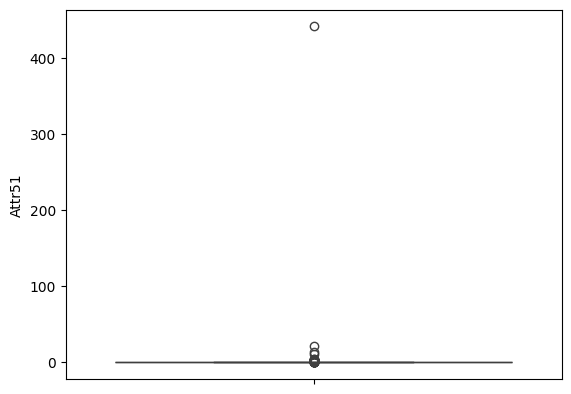

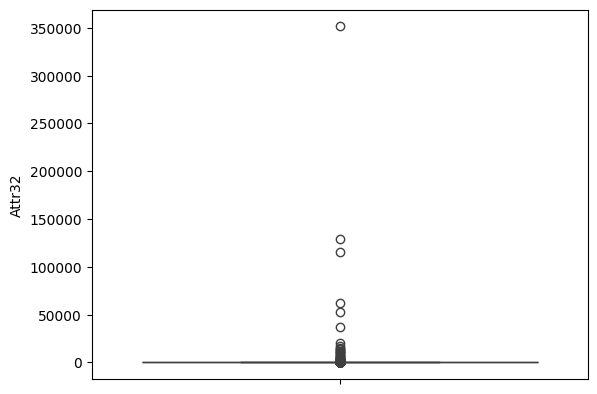

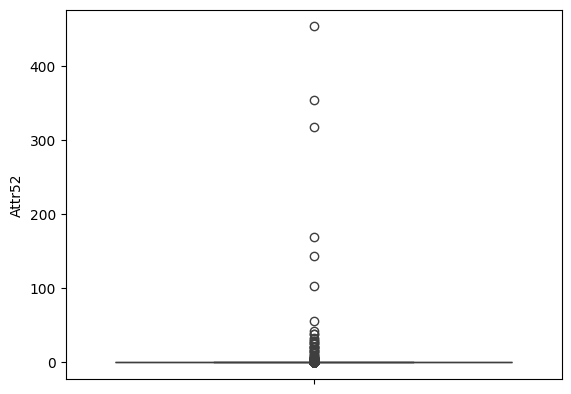

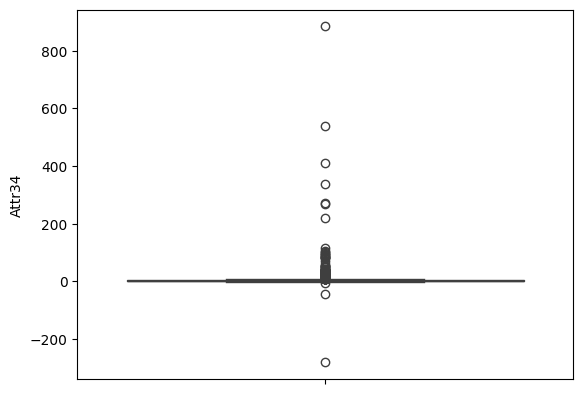

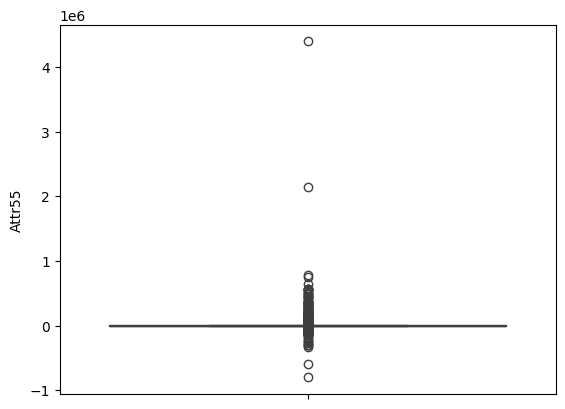

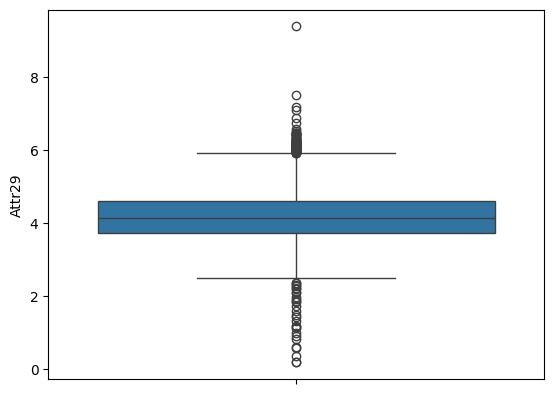

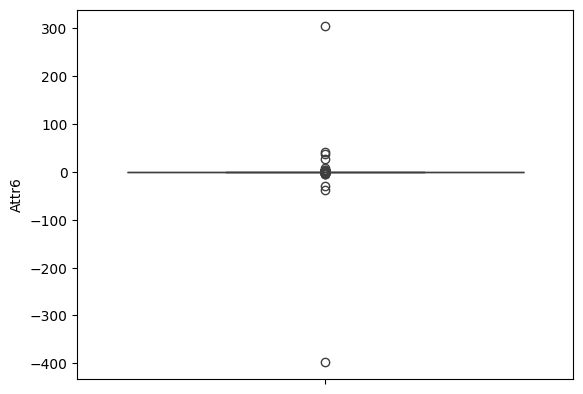

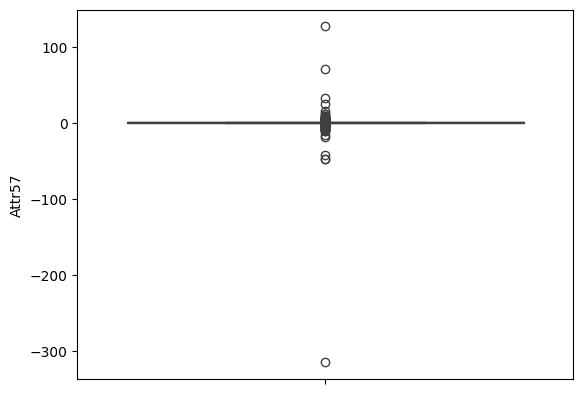

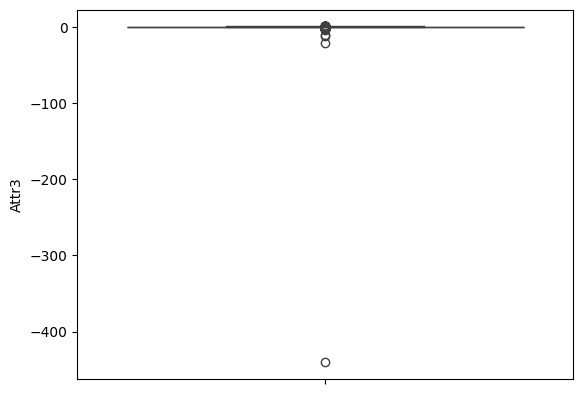

In [138]:
k=(["Attr2","Attr51","Attr32","Attr52", "Attr34","Attr55","Attr29","Attr6","Attr57","Attr3"])
for i in k:
  sns.boxplot(data[i])
  plt.show()

In [139]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
for i in k:
  data[i]=np.where(data[i]>upper_limit[i],upper_limit[i],data[i])
  data[i]=np.where(data[i]<lower_limit[i],lower_limit[i],data[i])

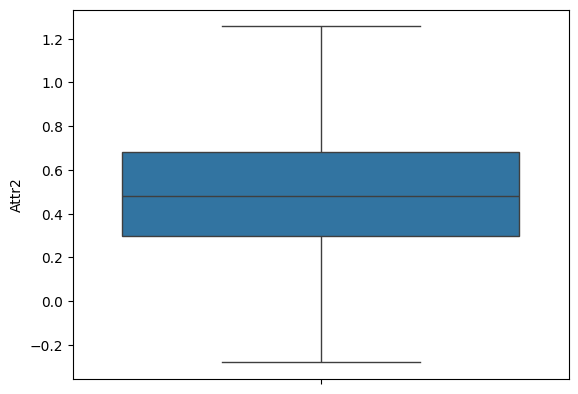

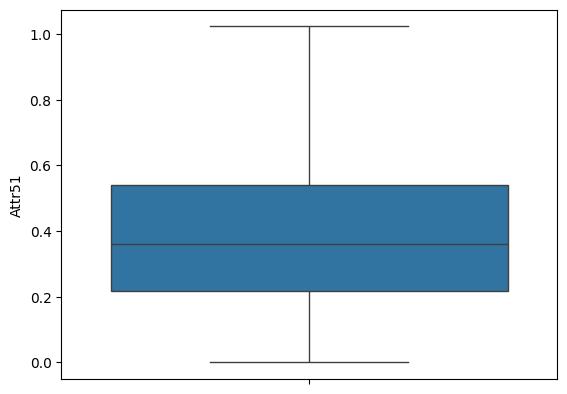

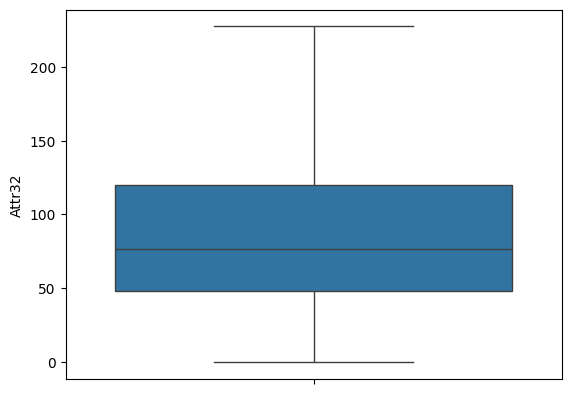

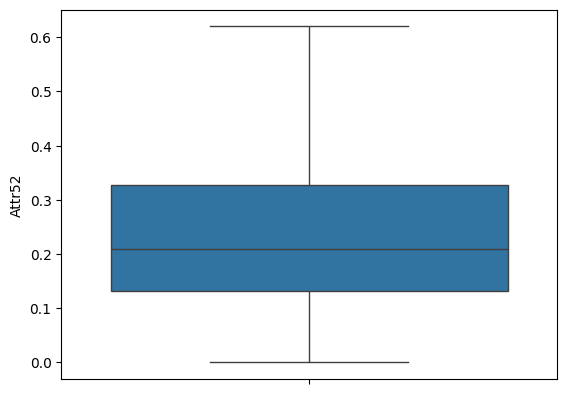

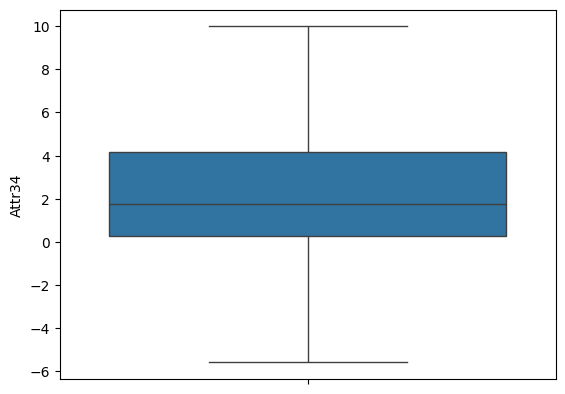

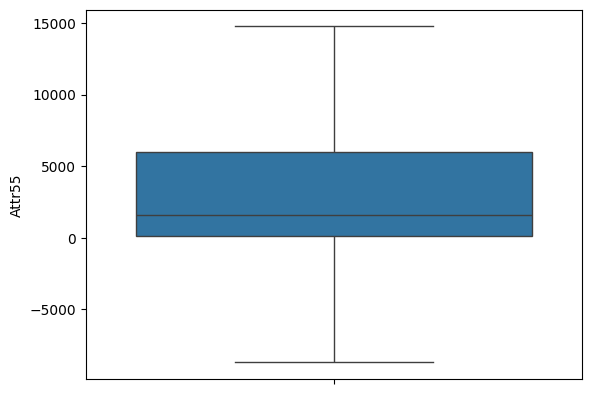

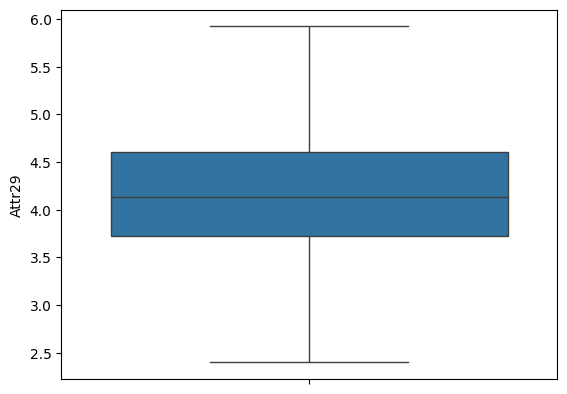

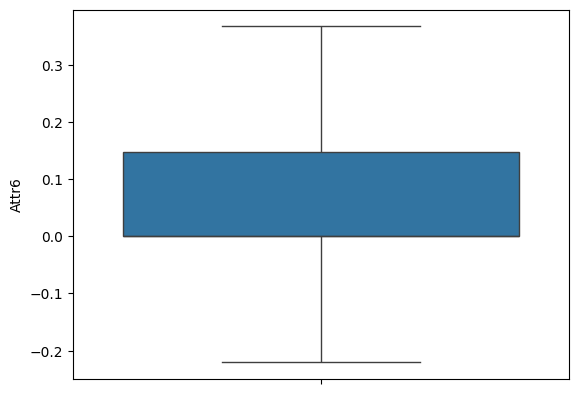

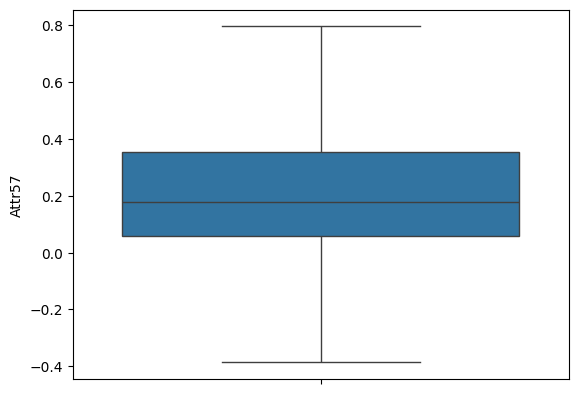

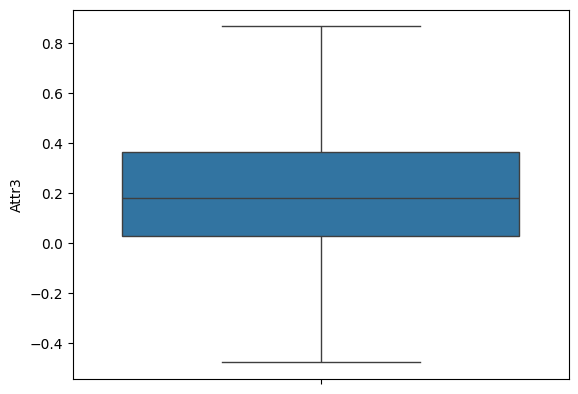

In [140]:
k=(["Attr2","Attr51","Attr32","Attr52", "Attr34","Attr55","Attr29","Attr6","Attr57","Attr3"])
for i in k:
  sns.boxplot(data[i])
  plt.show()

Dealing with Imbalanced Data

In [141]:
x=selected_variable
y=data['class']

In [142]:
x_scaled=pd.DataFrame(StandardScaler(copy=False).fit_transform(x))
x_scaled.columns=x.columns

In [143]:
x.head()

,Attr2,Attr51,Attr32,Attr52,Attr34,Attr55,Attr29,Attr6,Attr57,Attr3
0,0.37951,0.37854,94.14,0.25792,0.56393,348690.0,5.9443,0.38825,0.39718,0.39641
1,0.49988,0.49988,122.17,0.33472,2.98760,2304.6,3.6884,0.00000,0.42002,0.47225
2,0.69592,0.48152,176.93,0.48474,1.42740,6332.7,4.3749,0.00000,0.81774,0.26713
3,0.30734,0.30734,91.37,0.25033,0.37581,20545.0,4.6511,0.14988,0.14207,0.45879
4,0.61323,0.56511,147.04,0.40285,0.32340,3186.6,4.1424,0.18732,0.48431,0.22960


SMOTE

In [144]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=123) # Now SMOTE is defined
x_sm, y_sm = sm.fit_resample(x_scaled, y)
print(f'''Shape of X before SMOTE: {x_scaled.shape}
Shape of X after SMOTE: {x_sm.shape}''',"\n\n")
print(f'''Target Class dstribution before SMOTE;\n{y.value_counts(normalize=True)}
 Target Class distribution after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE: (7012, 10)
Shape of X after SMOTE: (13512, 10) 


Target Class dstribution before SMOTE;
class
0    0.963491
1    0.036509
Name: proportion, dtype: float64
 Target Class distribution after SMOTE :
class
0    0.5
1    0.5
Name: proportion, dtype: float64


Train-Test Split

In [145]:

x

,Attr2,Attr51,Attr32,Attr52,Attr34,Attr55,Attr29,Attr6,Attr57,Attr3
0,0.379510,0.378540,94.140,0.257920,0.56393,348690.00,5.9443,0.388250,0.397180,0.396410
1,0.499880,0.499880,122.170,0.334720,2.98760,2304.60,3.6884,0.000000,0.420020,0.472250
2,0.695920,0.481520,176.930,0.484740,1.42740,6332.70,4.3749,0.000000,0.817740,0.267130
3,0.307340,0.307340,91.370,0.250330,0.37581,20545.00,4.6511,0.149880,0.142070,0.458790
4,0.613230,0.565110,147.040,0.402850,0.32340,3186.60,4.1424,0.187320,0.484310,0.229600
...,...,...,...,...,...,...,...,...,...,...
7007,0.071884,0.071884,57.846,0.158480,0.64664,5775.70,4.0724,0.038665,0.048599,0.488840
7008,0.851600,0.402920,119.130,0.323870,1.46090,14.00,3.6067,0.086248,0.007349,0.003463
7009,0.705500,0.635270,25.409,0.068548,13.13600,-396.00,3.9236,0.000000,-0.310490,-0.047216
7010,3.335700,3.335700,123.330,0.337570,2.96230,-217.42,1.9636,-3.396300,-0.059122,-2.364000


In [146]:
y=data['class']

In [147]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7007    1
7008    1
7009    1
7010    1
7011    1
Name: class, Length: 7012, dtype: int64

In [148]:
x_train , x_test , y_train , y_test = train_test_split(x_sm,y_sm,test_size=0.3)

In [149]:
print("Shape of x_taian:",x_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_taian: (9458, 10)
Shape of y_train: (9458,)
Shape of x_test: (4054, 10)
Shape of y_test: (4054,)


Training and Testing The Models Using Algorithms :-

Support vector Classifier :


In [150]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf',random_state=0)
svm.fit(x_train,y_train)

SVC(random_state=0)

In [151]:
y_pred_svc=svm.predict(x_test)

In [152]:
print('Training Set:',svm.score(x_train,y_train))
print('Testing Set:',svm.score(x_test,y_test))

Training Set: 0.6572213998731233
Testing Set: 0.6470152935372472


In [153]:


accuracy_SVC=svm.score(x_test,y_test)
print('Accuracy_SVM:',accuracy_SVC*100)

Accuracy_SVM: 64.70152935372472


In [184]:
from sklearn.metrics import classification_report

# Assuming y_test is your true labels and predictionRF is your predicted labels
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1991
           1       0.66      0.63      0.64      2063

    accuracy                           0.65      4054
   macro avg       0.65      0.65      0.65      4054
weighted avg       0.65      0.65      0.65      4054



In [185]:
print(confusion_matrix(y_test, y_pred_dt))

[[1730  261]
 [ 192 1871]]


Decision Tree Classifier :

In [154]:
!pip install scikit-learn  # Install scikit-learn if you haven't alrefrom sklearn.tree import DecisionTreeClassifier  # Import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
dt = DecisionTreeClassifier()  # Now you can create an instance


In [155]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [156]:
y_pred_dt=dt.predict(x_test)

In [157]:
print('Training Set: ',dt.score(x_train,y_train))
print('Test Set: ',dt.score(x_test,y_test))

Training Set:  1.0
Test Set:  0.8882585101134681


In [158]:
from sklearn import metrics # Import the metrics module
dt = DecisionTreeClassifier()
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_dt)*100) # Now you can use metrics.accuracy_score

Accuracy: 88.82585101134681


In [159]:
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print('Accuracy_DT: ', accuracy_dt*100)

Accuracy_DT:  88.82585101134681


In [181]:
from sklearn.metrics import classification_report

# Assuming y_test is your true labels and predictionRF is your predicted labels
print(classification_report(y_test,y_pred_dt))


              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1991
           1       0.88      0.91      0.89      2063

    accuracy                           0.89      4054
   macro avg       0.89      0.89      0.89      4054
weighted avg       0.89      0.89      0.89      4054



In [182]:
print(confusion_matrix(y_test, y_pred_dt))

[[1730  261]
 [ 192 1871]]


Random Forest :

In [160]:
from sklearn.ensemble import RandomForestClassifier
rand_forest= RandomForestClassifier(random_state=42)
rand_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [161]:
predictionRF=rand_forest .predict(x_test)
#checking the accuracy on the training set
print('Training set :', rand_forest.score(x_train,y_train))
#checking the accuracy on the testing set
print('Testing set :', rand_forest.score(x_test,y_test))


Training set : 1.0
Testing set : 0.9435125801677355


In [162]:
accuracy_RF=rand_forest.score(x_test, y_test)
print('Accuracy_RF: ', accuracy_RF*100)

Accuracy_RF:  94.35125801677356


In [179]:
from sklearn.metrics import classification_report

# Assuming y_test is your true labels and predictionRF is your predicted labels
print(classification_report(y_test, predictionRF))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1991
           1       0.94      0.95      0.94      2063

    accuracy                           0.94      4054
   macro avg       0.94      0.94      0.94      4054
weighted avg       0.94      0.94      0.94      4054



In [177]:
print(confusion_matrix(y_test, predictionRF))

[[1860  131]
 [  98 1965]]


###performance Testing & Hyperparameter Tuning :-

Comparing All The Models & Accuracies

In [163]:
#creating a table to compare the accuracies of each model
accuracy_df = pd.DataFrame({
      'Model':['SVM','DecisionTree','Randomforest'],
      'Accuracy': [accuracy_SVC*100,accuracy_dt*100,accuracy_RF*100]})
print(accuracy_df)

          Model   Accuracy
0           SVM  64.701529
1  DecisionTree  88.825851
2  Randomforest  94.351258


Graphical Representstion of The Model Comparsion :-

Text(0, 0.5, 'Accuracy')

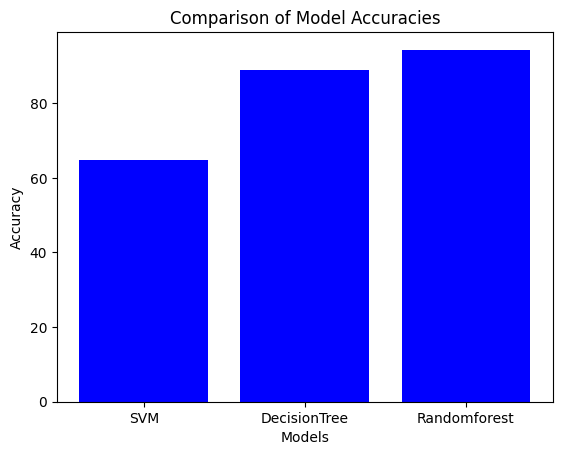

In [164]:
models=['SVM','DecisionTree','Randomforest']
accuracy=[accuracy_SVC*100,accuracy_dt*100,accuracy_RF*100]
plt.bar(models, accuracy, color='blue')
#Add titleand axis labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')


Performing Testing

Random Forest Classifier

In [165]:
example=[['0.613230',	'0.565110',	'147.040',	'0.402850','0.32340','3186.60',	'4.1424',	'0.187320',	'0.484310',	'0.229600']]
result=rand_forest.predict(example)
print(result)

[0]


Support Vector Machine

In [168]:
example=[['0.613230',	'0.565110',	'147.040',	'0.402850','0.32340','3186.60',	'4.1424',	'0.187320',	'0.484310',	'0.229600']]
result=svm.predict(example)
print(result)

[1]


Decision Tree Classifier

In [171]:
dt.fit(x_train,y_train)
example=([['0.613230', '0.565110', '147.040', '0.402850','0.32340', '3186.60', '4.1424', '0.187320', '0.484310', '0.229600']])
result=dt.predict(example)
print(result)

[0]


###Model Deployment :-

Saving the Model

In [174]:
#Exporting the model
import pickle
pickle.dump(dt,open('model.pkl','wb'))

Test the model:

In [175]:
model=pickle.load(open("/content/model.pkl",'rb'))
print(model.predict([[0.613230,	0.565110,	147.040,	0.402850,0.32340,3186.60,	4.1424,	0.187320,0.484310,0.229600]]))

[0]
